#Data Viz -1

In [ ]:
import numpy as np
import pandas as pd

## Content

- Intro to Matplotlib & Seaborn
- Tencent Use Case
- Anatomy of Matplotlib
- Components of a Matplotlib plot
- Univariate Data Visualization
  - Categorical
    - Bar chart
    - Countplot
    - Pie chart
  - Continous
    - Histogram
    - KDE plot
    - Box and Whiskers plot

### Importing Matplotlib & Seaborn

In case of `matplotlib`,
- We don't need to import the entire library but just its sub-module `pyplot`.
- We'll use the alias name `plt`.

#### What is `pyplot`?  
- `pyplot` is a **sub-module for visualization** in `matplotlib`.
- Think of it as a **high-level API** which **makes plotting an easy task**.
- Data Scientists stick to using `pyplot` only unless they want to create **something totally new.

For `seaborn`,
- We will be importing the whole seaborn library as alias `sns`.

#### What is seaborn?

Seaborn is another visualization library which uses Matplotlib in the backend for plotting.

#### What is the major difference then between both matplotlib and seaborn?

- `Seaborn` is built on the top of `Pandas` and `Matplotlib`.
- Seaborn uses **fascinating themes** and **reduces number of code lines** by doing a lot of work in the backend.
- While matplotlib is used to **plot basic plots and add more functionlaity** on top of that

As we proceed through the lecture, we will see the difference between both the libraries.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Before we dive into learning these libraries, lets answer some general questions.

#### Why do even we need to visualize data?

- **Exploratory**  - I can’t see certain patterns just by crunching numbers (avg, rates, %ages).
- **Explanatory** -  I have the numbers crunches and insights ready, but I’d like a visual art for storytelling.

#### What do we already know?

**Data**
- Rows: Samples, Data-points, Records
- Columns: Features, Variables

At the fundamental level, we have two types of data:
- Numerical/Continous
- Categorical

Categorical can be further divided into:
  - **Ordinal:** Categorical data with an order (e.g. low, medium, high)
  - **Non-ordinal/nominal:** Categorical data without any order (e.g. Male/Female)


### Video Games Analysis

You are a Data Scientist at "Tencent Games".

You need to analyze what kind of games the company should create in order to perform better in the market.

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2025-01-30 09:27:18--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.167.84.148, 3.167.84.196, 3.167.84.28, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.167.84.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  --.-KB/s    in 0.04s   

2025-01-30 09:27:18 (44.3 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [ ]:
df=pd.read_csv('/content/final_vg.csv')

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16652 entries, 0 to 16651
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16652 non-null  int64  
 1   Name          16652 non-null  object 
 2   Platform      16652 non-null  object 
 3   Year          16381 non-null  float64
 4   Genre         16652 non-null  object 
 5   Publisher     16594 non-null  object 
 6   NA_Sales      16652 non-null  float64
 7   EU_Sales      16652 non-null  float64
 8   JP_Sales      16652 non-null  float64
 9   Other_Sales   16652 non-null  float64
 10  Global_Sales  16652 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.shape

(16652, 11)

In [ ]:
df.describe(include='object')

,Name,Platform,Genre,Publisher
count,16652,16652,16652,16594
unique,11493,33,12,578
top,Ice Hockey,DS,Action,Electronic Arts
freq,41,2163,3316,1351


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16652.000000,16381.000000,16652.000000,16652.000000,16652.000000,16652.000000,16652.000000
mean,8283.409620,2006.390513,2.752314,1.996875,2.499677,1.151829,8.457873
std,4794.471477,5.863261,1.327002,1.322972,1.164023,1.054813,3.717756
min,1.000000,1980.000000,0.140000,0.010000,0.000000,-0.474276,0.240000
25%,4129.750000,2003.000000,1.781124,1.087977,1.781124,0.394830,5.580341
50%,8273.500000,2007.000000,2.697415,1.714664,2.480356,0.491870,7.536614
75%,12436.250000,2010.000000,3.677290,2.795123,3.176299,1.781124,11.227334
max,16600.000000,2020.000000,8.725452,8.367985,12.722984,7.358020,30.555862


**Note** - We have done Exploratory data analysis so far

##Basic Plot

In [ ]:
x_val=[1,0,2]
y_val=[20,10,30]

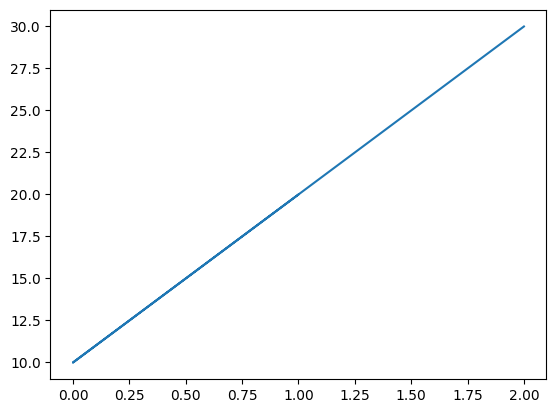

In [ ]:
plt.plot(x_val,y_val)

## Anatomy of Matplotlib

<!-- <img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/567/original/image_2022-11-10_121820129.png?1668062911"> -->


<!-- <img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" />
<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/579/original/image_2022-11-10_150131378.png?1668072693"> -->

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/615/original/image_2022-11-11_112008033.png?1668145811">

Woah! There is a lot of information in this image. Let's understand them one at a time.

### Components of a Matplotlib plot

- Figure: The **overall window** or page that everything is drawn on.
  - You can create multiple independent Figures in Jupyter.
  - If you run the code in terminal, separate windows will pop-up.
- Axes: You can add multiple **Axes** to the Figure, which represents a plot.

- **Axis**: Simply the `x-axis` and `y-axis`

- **Axes**: It is the **area** on which the **data is plotted** with functions such as `plot()`.
    - **x-label**: Name of x-axis
    - **y-label**: Name of y-axis

- **Major ticks**:
  - Subdivides the axis into major units.
  - They appear by default during plotting.
- **Minor ticks**:
  - Subdivides the major tick units.
  - They are by default hidden and can be toggled on.

- **Title**: Title of each plot **(Axes)**

- **Subtitle**: The common title of all the plots.

- **Legend**:
  - Describes the elements in the plot.
  - Blue and Green curves in this case.

These are the major components of a matplotlib plot.

### How to choose the right plot?

Firstly, it depends on the what is your question of interest.

When the question is clear
- How many variables are involved?
- Whether the variable(s) are numerical or categorical?

**How many variables are involved?**

- 1 Variable $\rightarrow$ Univariate Analysis
- 2 Variables $\rightarrow$ Bivariate Analysis
- 3+ Variables $\rightarrow$ Multivariate Analysis

**What are the possible cases?**

#### Univariate
- Numerical
- Categorical

#### Bivariate
- Numerical-Numerical
- Numerical-Categorical
- Categorical-Categorical

#### Multivariate

Let's start with these and then we can generalize.

- Numerical-Numerical-Categorical
- Categorical-Categorical-Numerical
- Categorical-Categorical-Categorical
- Numerical-Numerical-Numerical

###Univariate Data Visulaization
**What kind of questions we may want to ask for a categorical variable?**

- What is the Distribution/Frequency of the data across different categories?
- What proportion does a particular category constitutes?

<!-- - What are the top-5 most popular genre of games played?
- Or distribution of sales across various parts of the world? -->

...and so on




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Bar Chart

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [ ]:
genre_count=df['Genre'].value_counts()

In [ ]:
genre_count.index

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'],
      dtype='object', name='Genre')

<BarContainer object of 12 artists>

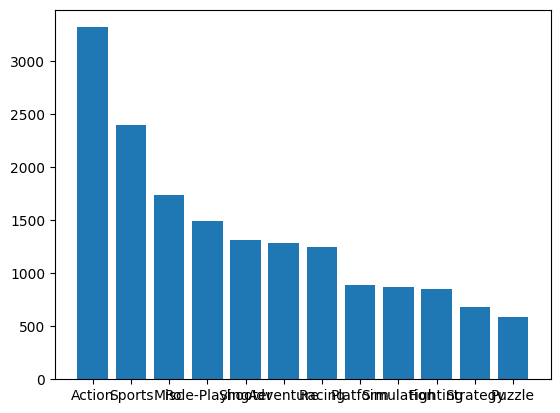

In [ ]:
plt.bar(genre_count.index,genre_count)

<Axes: xlabel='Genre', ylabel='count'>

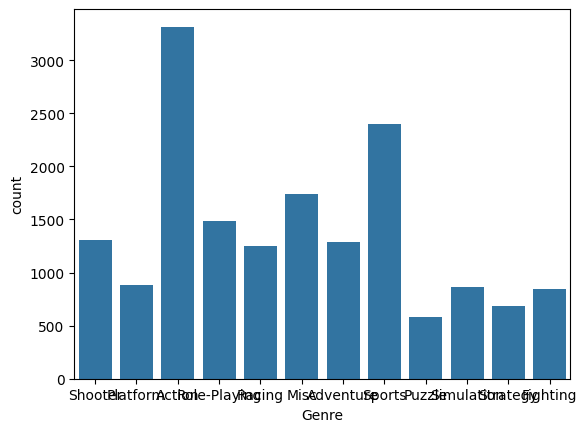

In [ ]:
sns.countplot(data=df,x='Genre')

**Changing the figure size**

<Axes: xlabel='Genre', ylabel='count'>

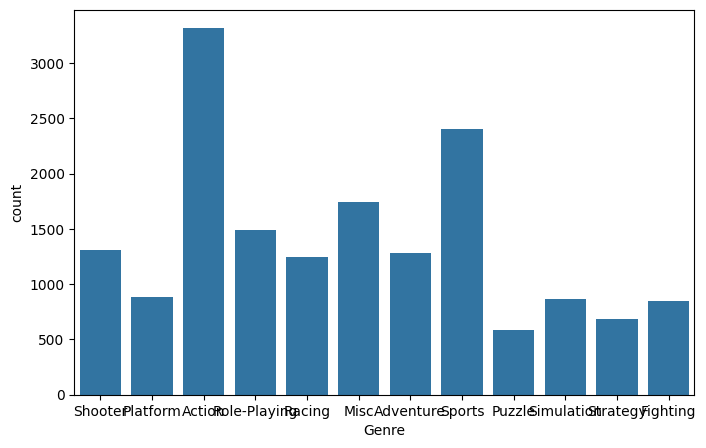

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Genre')

**Rotating the labels**

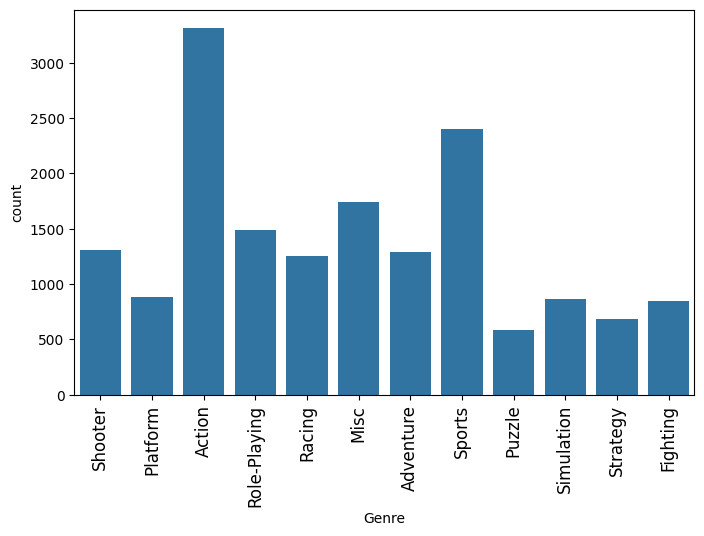

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Genre')
plt.xticks(rotation=90,fontsize=12)
plt.show()

**Adding the title and labels for the chart**

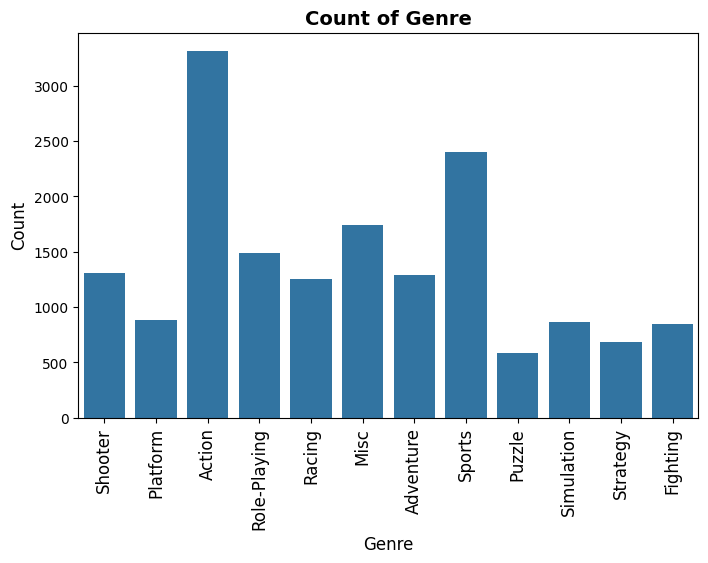

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Genre')  #This is main syntax
plt.xticks(rotation=90,fontsize=12)
plt.title('Count of Genre',fontsize=14,fontweight='bold')
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

**Changing color of the graph**

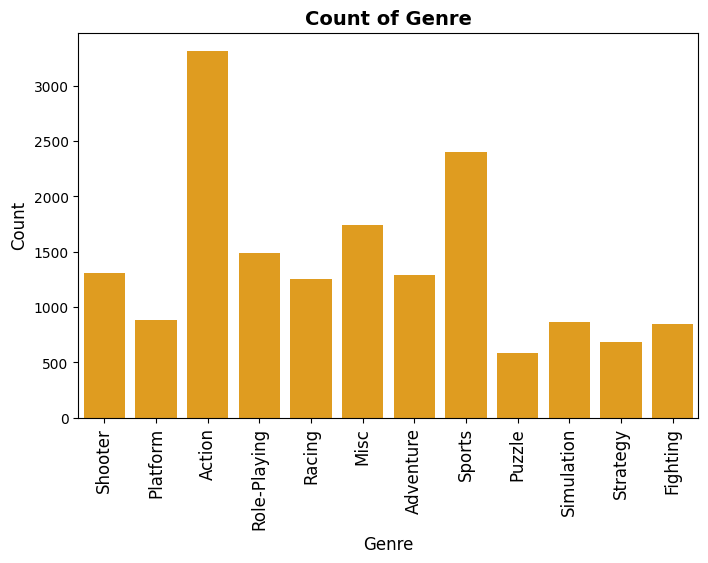

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Genre',color='orange')  #This is main syntax
plt.xticks(rotation=90,fontsize=12)
plt.title('Count of Genre',fontsize=14,fontweight='bold')
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

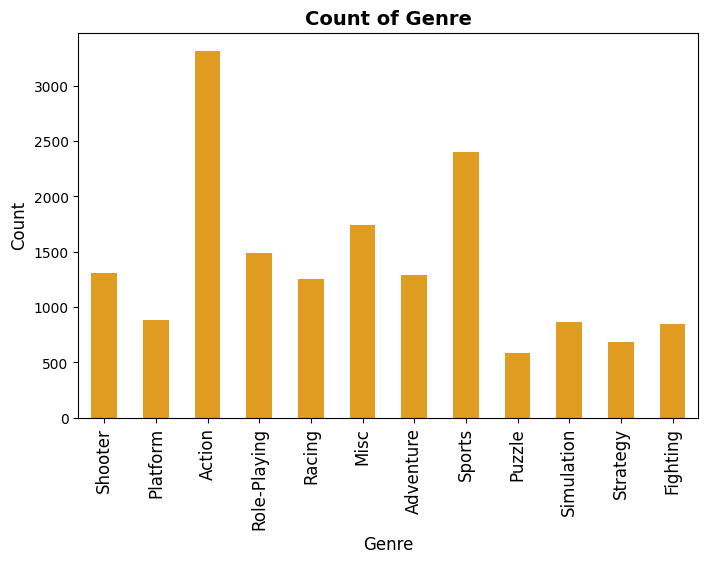

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Genre',color='orange',width= 0.5)  #This is main syntax
plt.xticks(rotation=90,fontsize=12)
plt.title('Count of Genre',fontsize=14,fontweight='bold')
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

###Pie chart

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [ ]:
data=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
region_sales=data.T.sum(axis=1)
region_sales

,0
NA_Sales,45831.525845
EU_Sales,33251.970702
JP_Sales,41624.625635
Other_Sales,19180.256828


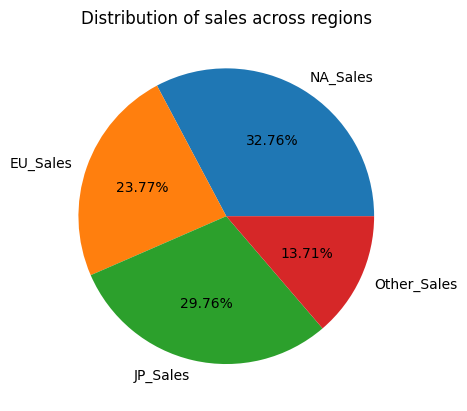

In [ ]:
plt.pie(region_sales,labels=region_sales.index,autopct='%.2f%%',)
plt.title('Distribution of sales across regions')
plt.show()

### Univariate Data Visualisation - Numerical Data

**What kind of questions we may have regarding a numerical variable?**

- How is the data distributed?
- Is the data skewed? Are there any outliers?
- How much percentage of data is below/above a certain number?
- Statistics like - Min, Max, Mean, Median, etc.

###Histogram

<Axes: xlabel='Year', ylabel='Count'>

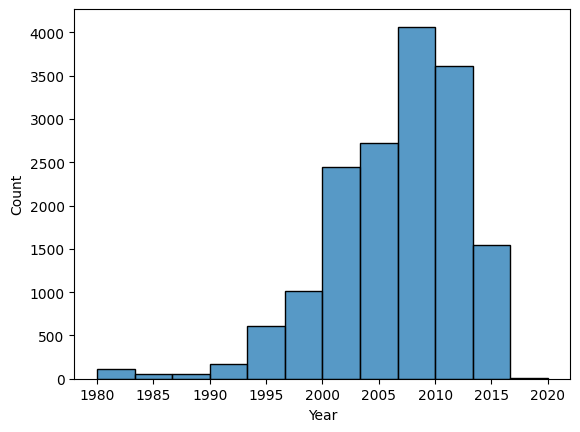

In [ ]:
sns.histplot(data=df, x='Year',bins=12)

###KDE PLOT

<Axes: xlabel='Year', ylabel='Density'>

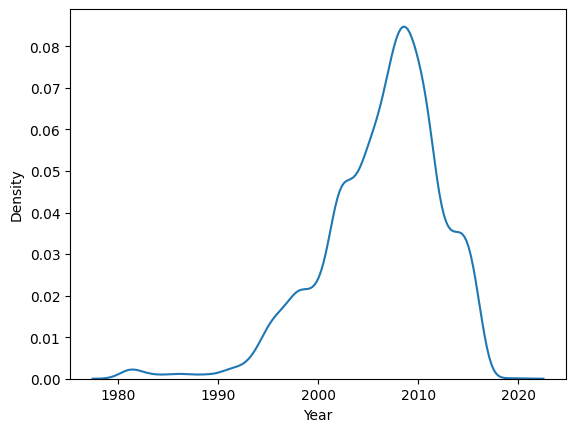

In [ ]:
sns.kdeplot(data=df,x='Year')

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


**Can you notice the difference between KDE plot and histogram?**

The Y-axis has **probability density estimation** instead of count.

You can read more about this on:
- https://en.wikipedia.org/wiki/Kernel_density_estimation
- https://www.youtube.com/watch?v=DCgPRaIDYXA


### Boxplot

**What if we want to find the aggregates like median, min, max and percentiles of the data.**

Say I want the typical earnings of a game when it is published.

**What kind of plot can we use here?** Boxplot

**What exactly is a Box plot?**

- A box plot or **box and whiskers plot** shows the **distribution of quantitative data**.
- It facilitates comparisons between
  - attributes
  - across levels

of a categorical attribute.

- The **box** shows the **quartiles** of the dataset.
- The **whiskers** show the **rest of the distribution**.
- Except for points that are determined to be **"outliers"** using a method that is a function of the **inter-quartile range**.

Let's go through the terminology one-by-one.

<!-- #### What's a quartile? -->

<!-- - Box plot shows distribution of numerical data and skewness through displaying the **data percentiles**, called **quartiles**. -->

#### Box plots show the five-number summary of data:
1. Minimum score
2. First (lower) quartile
3. Median
4. Third (upper) quartile
5. Maximum score

##### 1. Minimum Score
- It is the **lowest value**, excluding outliers.
- It is shown at the **end of bottom whisker**.

#### 2. Lower Quartile
- **25% of values** fall below the lower quartile value.
- It is also known as the **first quartile**.

##### 3. Median
- Median marks the **mid-point of the data**.
- It is shown by the **line that divides the box into two parts**.
- **Half the scores are greater than or equal to this value and half are less**.
- It is sometimes known as the **second quartile**.

##### 4. Upper Quartile
- **75% of values** fall below the upper quartile value.
- It is also known as the **third quartile**.

#### Maximum Score
- It is the **highest value**, excluding outliers.
- It is shown at the **end of upper whisker**.

#### Whiskers
- The upper and lower whiskers represent **values outside the middle 50%**.
- That is, the **lower 25% of values** and the **upper 25% of values**.

#### Interquartile Range (or IQR)
- This is the box plot showing the **middle 50% of scores**.
- It is the **range between the 25th and 75th percentile**.

\
**Let's plot a box plot to find the average typical earnings for a game.**

<Axes: ylabel='Global_Sales'>

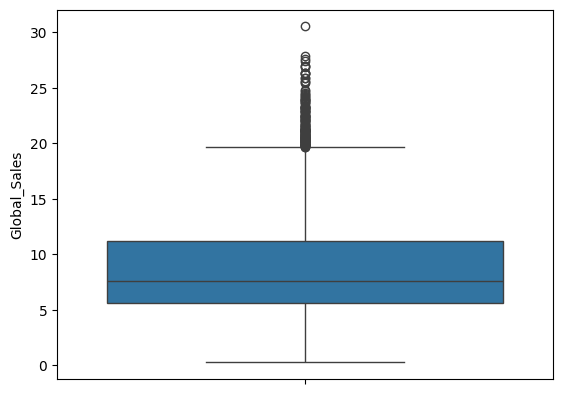

In [ ]:
sns.boxplot(df['Global_Sales'])

**What can we infer from this?**

The 5 point estimates here are:
- Minimum, excluding outliers: 0
- Maximum, excluding outliers: 20 (in million dollars)
- 25th Quantile: 6 million
- Median: around 7 million
- 75th Quantile: 12 million

**Note:**
- The outliers always will appear either below the minimum or above the maximum.
- There are quite a few outliers above 20 million dollars, represented by black colored circles.

#Data Viz -2

#Quiz

### **Question-1**

Q. For analyzing marks given by an edtech company, we want to find the range in which the most number of students have scored.

Which will be the best suited plot for this?

```
a. Pie Chart

b. Histogram

c. Countplot

d. Line Plot
```

### **Question-2**

Q. The telecom company "Airtel" wants to find the count customers across different payment modes opted by the customer.

Which will be the best suited plot for this?

```
a. Pie Chart

b. Countplot

c. Line Plot

d. Boxplot

### **Question-3**

Q. In the state “Haryana”, we want to find the proportion of people who smoke.

Which will be the best suited plot for this?

```
a. Pie Chart

b. Bar Chart

c. Countplot

d. Boxplot
```

##Answers

**Ques 1**

Answer: Histogram

Explanation:

A histogram provides a visual representation of the distribution of numerical data, divided into intervals called bins. It allows you to see the frequency or count of data points within each bin, making it ideal for identifying the range in which the most number of students have scored. By observing the peak(s) in the histogram, you can easily determine the range(s) with the highest frequency of scores.


**Ques 2**


Answer: Count Plot

Explanation:

A countplot is specifically designed for visualizing the count of observations in each category of a categorical variable. In this case, the payment modes are categorical variables, and the countplot will provide a clear representation of the number of customers using each payment mode. This makes it ideal for comparing the distribution of customers across different payment modes.


**Ques 3**


Answer: Pie Chart

Explanation:

A pie chart is an effective way to represent proportions or percentages within a whole. In this case, the proportion of people who smoke can be represented as a fraction of the entire population of "Haryana". Each section of the pie chart would represent a different category, such as smokers and non-smokers, allowing for a clear visual comparison of the proportion of smokers in the population.